# Tutorial 2 - Cloudy

## Simulation 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
abundances = ['primordial', 'solar', 'nova', 'ism', 'pn']

/tmp/ipykernel_212/3834714848.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig("spec.pdf", figsize=(10,50), dpi=100)


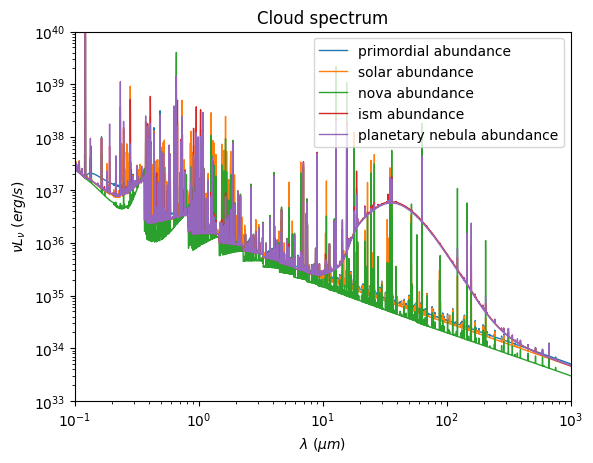

In [28]:
for abn in abundances:
    filename = abn+'.con'
    con = pd.read_csv(filename, sep='\t', engine='python')
    lam = con["#Cont  nu"]
    lum = con["total"]
    if abn == "pn":
        abn = "planetary nebula"
    plt.plot(lam, lum, linewidth=1, label=abn+" abundance")
    plt.xlim(1e-1, 1e+3)
    plt.ylim(1e+33, 1e+40)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r"$\lambda$ $(\mu m)$")
    plt.ylabel(r"$\nu L_\nu$ $(erg/s)$")
    
plt.title("Cloud spectrum")
plt.legend()
plt.savefig("spec.pdf", figsize=(10,50), dpi=100)
plt.show()

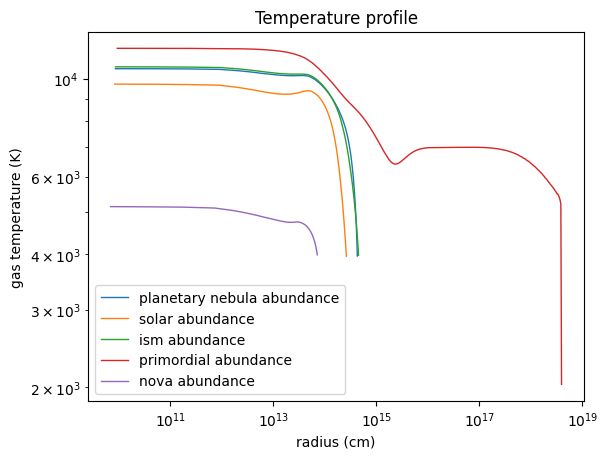

In [14]:
for abn in abundances:
    filename = abn+'.ovr'
    ovr = pd.read_csv(filename, sep='\t', engine='python')
    rad = ovr["#depth"]
    temp = ovr["Te"]
    if abn == "pn":
        abn = "planetary nebula"
    plt.plot(rad, temp, linewidth=1, label = abn+" abundance")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("radius (cm)")
    plt.ylabel("gas temperature (K)")
    
plt.title("Temperature profile")
plt.legend()
plt.savefig("temp.pdf", dpi=100)
plt.show()

## Simulation 2

In [2]:
hden = [10, 9, 8]

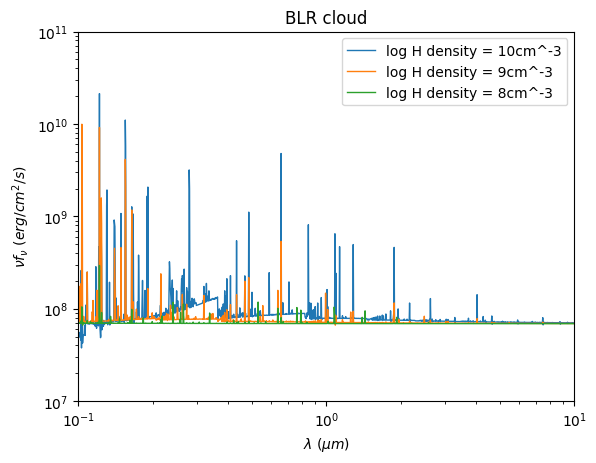

In [10]:
for i in hden:
    con = pd.read_csv("blr"+str(i)+".con", sep='\t', engine='python')
    lam = con["#Cont  nu"]
    lum = con["total"]
    plt.plot(lam, lum, linewidth=1, label = "log H density = "+str(i) + "cm^-3")
    plt.xlim([1e-1, 1e1])
    plt.ylim(1e7, 1e11)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r"$\lambda$ $(\mu m)$")
    plt.ylabel(r"$\nu f_\nu$ $(erg/cm^2/s)$")

plt.legend()
plt.title("BLR cloud")
plt.savefig("blr_hden.pdf", dpi=100)

      #Cont  nu    incident  trans  DiffOut  net trans         reflc  \
6215   0.030363  68910000.0    0.0    82.84      82.84  8.906000e+09   

             total        reflin  outlin lineID  cont     nLine  
6215  8.906000e+09  8.905000e+09   82.84   He 2  K  1  12024.81  
      #Cont  nu    incident       trans      DiffOut    net trans  \
6215   0.030363  68910000.0  40410000.0  939000000.0  979400000.0   

             reflc         total        reflin       outlin lineID  cont  \
6215  1.035000e+10  1.133000e+10  1.035000e+10  938800000.0   He 2  K  1   

         nLine  
6215  12024.81  
      #Cont  nu    incident       trans      DiffOut    net trans  \
6215   0.030363  68910000.0  60790000.0  291400000.0  352200000.0   

            reflc        total       reflin       outlin lineID  cont  \
6215  345100000.0  697300000.0  344000000.0  290900000.0   He 2  K  1   

         nLine  
6215  12024.81  


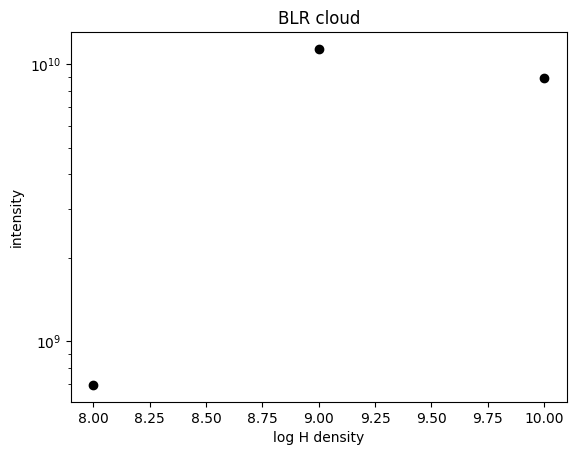

In [16]:
for i in hden:
    con = pd.read_csv("blr"+str(i)+".con", sep='\t', engine='python')
    line = con[con["#Cont  nu"] == 3.03628e-02]
    print(line)
    lum = line["total"].values
    plt.scatter(i, lum, linewidth=1, c='k')
    #plt.xlim([1e-1, 1e1])
    #plt.ylim(1e7, 1e11)
    #plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("log H density")
    plt.ylabel("intensity")

#plt.legend()
plt.title("BLR cloud")
plt.savefig("blr_int.pdf", dpi=100)